# Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### **Overview**
>This is Assignment-3 of Machine Learning Foundation Nanodegree. In this project, I decided to use TMDb movies dataset for doing some exploratory analysis. 

>This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consists of 21 columns such as imdb_id, revenue, budget, vote_count etc.;.

>#### **Following are some of the questions that can be answered from analysing this dataset**
> 1. Movies which made the most and least profits.
> 2. Movies with the highest and lowest budgets.
> 3. Movies with the most and least earned revenue.
> 4. Movies with the longest and shortest runtimes.
> 5. Average runtime of the movies.
> 6. Finding the year in which we had the most no.of profitable movies.
>----------------------------------------------------------------------
> 7. Successful genres (with respest to the profitable movies).
> 8. Most frequent cast (with respest to the profitable movies).
> 9. Average budget (with respest to the profitable movies).
> 10. Average revenue (with respest to the profitable movies).
> 11. Average duration of the movies (with respest to the profitable movies).
.
.
.
.
.

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pprint
import csv

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposing some possible questions for the analysis, we will now be focusing on keeping only the relevent features by deleting the unused columns & rows so that, we can make our calculations easy and understandable.

### General Properties

In [2]:
# Loading the csv file and storing it in the variable "tmbd_data"
tmdb_data = pd.read_csv('tmdb-movies.csv')

print("-------")
print("SUMMARY")
print("-------")
print(tmdb_data.describe())   # Stats of the dataset
print('\n')

# Printing the first 5 rows with all the defined columns of tmdb-movies database
tmdb_data.head()

-------
SUMMARY
-------
                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058  

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> ### Obsevations from the dataset
>
>(1) **NO** unit of currency is mentioned in the dataset. So I will safely move on with the assumption that US Dollar is the unit of currency as it is one of the mostly accepted currencies internationally.
>
>(2) vote_count is *different* for all the movies, so we cannot directly calculate the popularity of the movies based on the average vote count.

### Data Cleaning (Removing the useless information from the dataset)

> **Important observations**
>
> 1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.;.
> 2. Removing the duplicacy in the rows (if any).
> 3. Some movies in the database have zero budget or zero revenue, i.e., that particular value has not been recorded. So we will be discarding any such entries.
> 4. Changing **release date** column into the proper Date format.
> 5. Replacing 'zero' with 'NAN' in **runtime** column.
> 6. Changing the format of **budget** and **revenue** columns.

>**1. Removing Unnecessary columns**
>
> **Columns that we need to delete are**: -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [3]:
# Creating a list of all the columns that are to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

# Dropping all the unnecessary columns
tmdb_data = tmdb_data.drop(del_col, axis=1)

# Previewing the last 6 rows from the new DataFrame
tmdb_data.tail(6)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
10860,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,87,Comedy,5/20/66,1966
10861,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,6/15/66,1966
10862,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,12/21/66,1966
10863,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,1/1/66,1966
10864,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,11/2/66,1966
10865,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,74,Horror,11/15/66,1966


> **2. Removing the duplicacy in the rows (if any)**
>
>Lets see how many total entries we have in the database.

In [4]:
rows, col = tmdb_data.shape
# We need to reduce the count of row by one as the contain header is also a row.
print('There are a total of {} movie entries and a total of {} no.of columns.'.format(rows-1, col))

There are a total of 10865 movie entries and a total of 10 no.of columns.


> Now, its time to remove any duplicate rows.

In [5]:
tmdb_data.drop_duplicates(keep='first', inplace=True)
rows, col = tmdb_data.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 10 no.of columns in it.


> So, there was a duplicate row (10865-10864) and it has been removed successfully. 

>**3. Removing 0's from the *budget* and the *revenue* columns**
>


In [6]:
# Creating a seperate list of the revenue and budget columns
temp_list = ['budget', 'revenue']

# This will replace all the value from '0' to 'NAN' in the list
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)

# Removing all the rows which have NaN value in the temp_list 
tmdb_data.dropna(subset=temp_list, inplace=True)

rows, col = tmdb_data.shape
print('So after removing all such entries, we now surprisingly have only {} no.of movies!'.format(rows-1))

So after removing all such entries, we now surprisingly have only 3853 no.of movies!


> **4. Changing the *release* date column into the standard Date format**

In [7]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [8]:
# Previewing the first 3 rows of the changed dataset
tmdb_data.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


>**5. Replacing 0's with NAN in the *runtime* column**


In [9]:
# Replacing 0's with 'NaN' of runtime column in the dataset
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NAN)

>**6. Changing the formats of the *budget* and *revenue* columns**

> Checking the current format of the 'budget' and the 'revenue' columns in the dataset.

In [10]:
# Printing the datatype of the data set
print(tmdb_data.dtypes)

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object


In [11]:
# Make a list of all the columns whose Datatype you are planning on changing
change_type = ['budget', 'revenue']

tmdb_data[change_type] = tmdb_data[change_type].applymap(np.int64)

# Previewing the changed information
print(tmdb_data.dtypes)

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object


<a id='eda'></a>
## Exploratory Data Analysis

> **1. Calculating the profit for each of the movies**

In [12]:
# Using 'insert' function with three parameters (i.e.; index of the column in the dataset, name of the column, value to be inserted)
tmdb_data.insert(2, 'profit_earned', tmdb_data['revenue']-tmdb_data['budget'])

# Previewing the changes in the dataset
tmdb_data.head()

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### Research Question 1 : Movies which made the most and least profits

In [13]:
def calculate(column):
    # For the highest earned profit
    high = tmdb_data[column].idxmax()
    high_details = pd.DataFrame(tmdb_data.loc[high])

    # For the lowest earned profit
    low = tmdb_data[column].idxmin()
    low_details = pd.DataFrame(tmdb_data.loc[low])

    # Collecting all the data in one place
    info = pd.concat([high_details, low_details], axis=1)

    return info

# Making a function call
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


> From the above information, we can clearly make the following statements: 
>
> Movie with the ID **1386** made the *highest* profit i.e; 2544505847 USD. Whereas, movie with the ID **2244** earned the *least* profit i.e; -413912431 USD.

### Research Question 2  : Movies with the highest and lowest budgets

In [14]:
# We will call the same function that we defined above (calculate(column)) for this analysis too
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


> From the above information, we can clearly make the following statements: 
>
> Movie with the ID **2244** shows the *largest* budget i.e.; 425000000 USD. Whereas, movie with the ID **2618** shows the *smallest* budget i.e.; 1 USD.

### Research Question 3 : Movies with the most and least earned revenue

In [15]:
# We will call the same function that we defined above (calculate(column)) for this analysis too
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


> From the above information, we can clearly make the following statements: 
>
> Movie with the ID **1386** shows the *largest* revenue earned i.e.; 2781505847 USD. Whereas, movie with the ID **5067** shows the *smallest* revenue earned i.e.; 2 USD.

### Research Question 4 : Movies with the longest and shortest runtimes

In [16]:
# We will call the same function that we defined above (calculate(column)) for this analysis too
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


> From the above information, we can clearly make the following statements: 
>
> Movie with the ID **2107** shows the *longest* runtime of 338 minutes. Whereas, the movie with the ID **5162** shows the *shortest* runtime of only 15 minutes.

### Research Question 5 : Average runtime of the movies

In [17]:
def avg_fun(column):
    '''
    Calculates the mean/average of a column
    '''
    return tmdb_data[column].mean()

In [18]:
# Calculate the average runtime of movies
print("The average runtime of the movies is: ", avg_fun('runtime'), "minutes")

The average runtime of the movies is:  109.22029060716139 minutes


> So the average runtime a movie is **109 minutes** approximately. Lets analyse it in an even more lucid way i.e.; by Graphical approach.

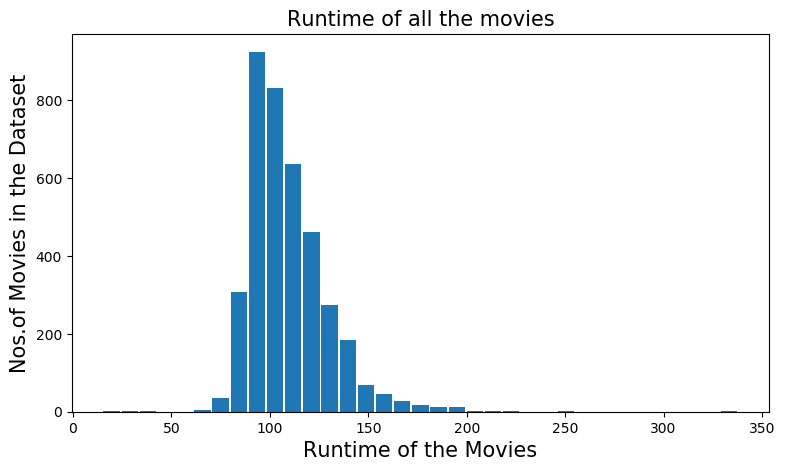

In [19]:
# Plotting a histogram of runtime of movies
plt.figure(figsize=(9,5), dpi=100)
plt.xlabel('Runtime of the Movies', fontsize = 15)   # On x-axis
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)   # On y-axis
plt.title('Runtime of all the movies', fontsize=15)   # Name/title of the graph

plt.hist(tmdb_data['runtime'], rwidth=0.9, bins=35)   # Plotting a histogram
plt.show()

> The distribution of the above formed graph is **positively skewed** or **right-skewed**! So, it is clear that most of the movies are timed between 80 to 115 minutes. Almost 1000 (or more) no.of movies satisfy this criteria. 
>
>**Let's now analyse *runtime* of the movie using a different series of plots i.e.; Box Plot and Data Point Plot.**

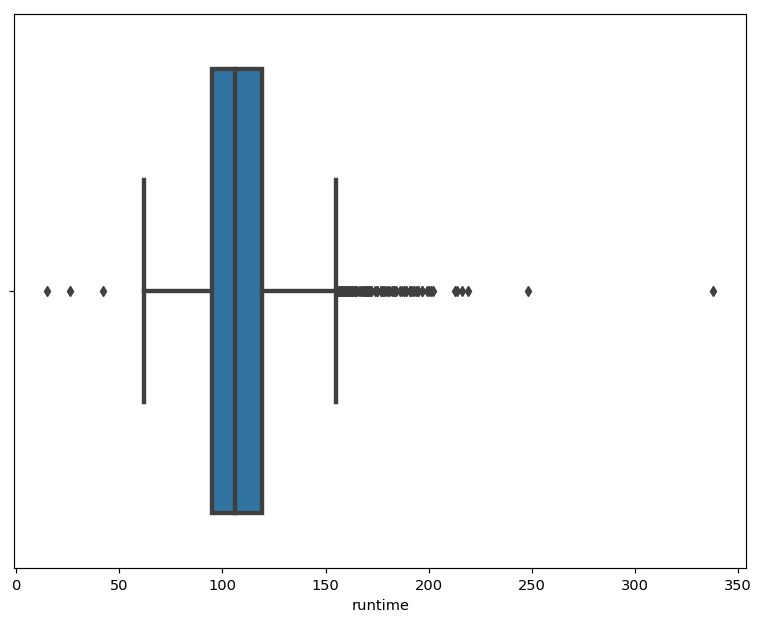

In [20]:
# The First plot is the "Box plot" of the 'runtime' of the movies
plt.figure(figsize=(9,7), dpi=105)
sns.boxplot(tmdb_data['runtime'], linewidth=3)
plt.show()

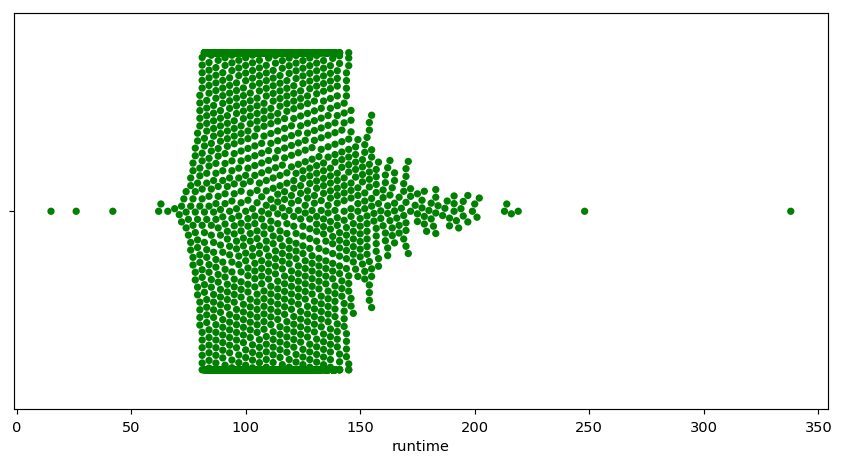

In [21]:
# The Second plot is the "Data points plot" of the 'runtime' of the movies
plt.figure(figsize=(10,5), dpi=105)
sns.swarmplot(tmdb_data['runtime'], color='green')
plt.show()

In [22]:
# Getting the statistics of the movie 'runtime' feature
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

>That's just awesome! The plot generated above give a visual of the complete distribution of 'runtime' of the movies by plotting the points againts their respective position in the ditribution.
>
> Considering our first plot i.e.; Box-plot, it gives us an overall idea of how far apart the ditribution is, in case of the 'runtime' of the movies. We can also get to see the outliers if we carefully observe the plot.
>
>By looking at both the plots and all the stats, we can conclude the following: -
>
> (1) 25% of the movies have a runtime of less than 95 minutes.<br>
> (2) 50% of the movies have a runtime of less than 109 minutes. (median) <br>
> (3) 75% of the movies have a runtime of less than 119 minutes.

### Research Question 6 : Year of release vs Profitability

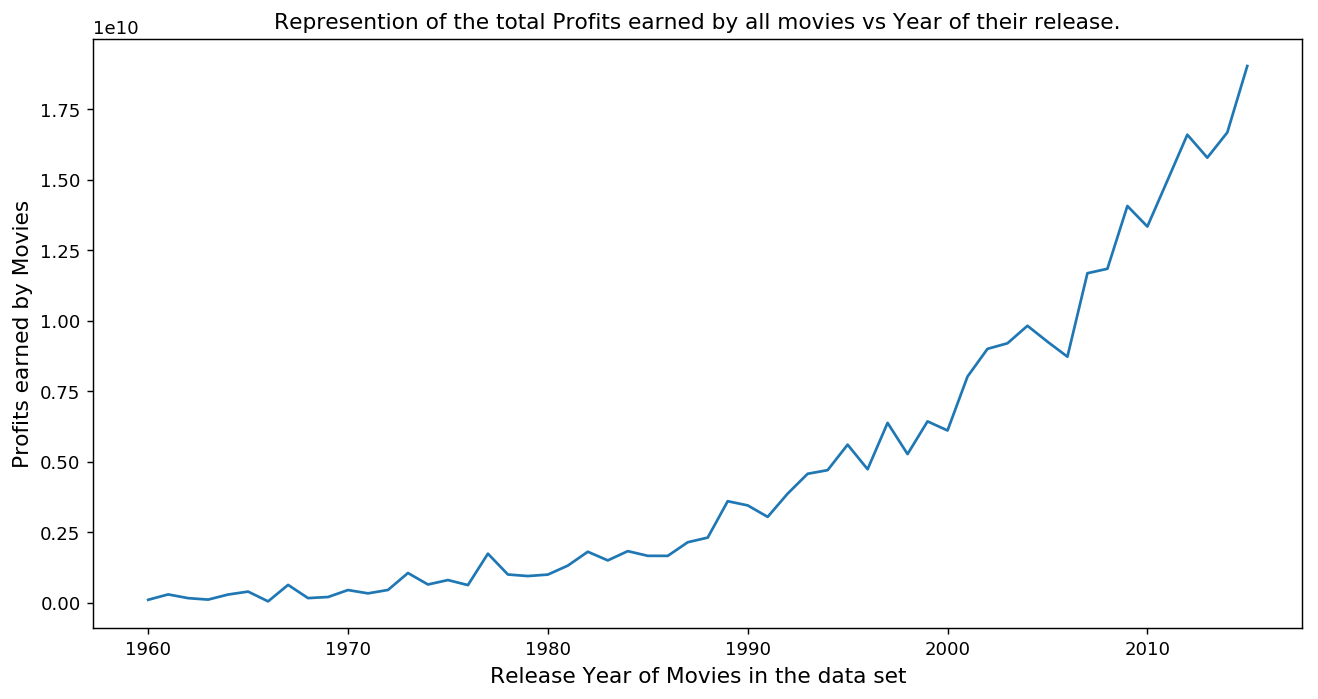

In [23]:
# We will be using the Line plots for this analysis. Since we want to know the profits of movies for every year therefore we have to sum up all the movies for a particular year

profits_year = tmdb_data.groupby('release_year')['profit_earned'].sum()

plt.figure(figsize=(12,6), dpi=130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)   # On x-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)   # On y-axis
plt.title('Represention of the total Profits earned by all movies vs Year of their release.')
plt.plot(profits_year)
plt.show()

In [24]:
# Do you want to find out which year made the highest profits? Here you go...
print("The year that made the highest profitable movies is: ", profits_year.idxmax())

The year that made the highest profitable movies is:  2015


> So we can finally conclude both graphically as well as by calculations that, year **2015** was the year during which the movies made the highest profits.
>
> We are now done with analysing the given dataset. We will now find out the characteristics of profitable movies.

>### With respect to the profitable movies
>
> Before moving further we need to clean our data again. We will be considering only those movies which have earned a significant amount of profits. 
>
>**So, let's fix this amount to 50 million USD.**

In [25]:
# Selecting only the movies that have a profit of $50M or more
profit_data = tmdb_data[tmdb_data['profit_earned'] >= 50000000]

# Re-indexing the new data
profit_data.index = range(len(profit_data))

# We will start our indexing from 1 instead of 0
profit_data.index = profit_data.index + 1

# Previewing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [26]:
# Counting the total no.of rows in the new DataFrame
print("The total no.of rows in the new DataFrame are: ", len(profit_data))

The total no.of rows in the new DataFrame are:  1338


> So our dataset is now reduced to **1338** from the previous **3853** rows.

### Research Question 7 : Succesful Genres

In [27]:
def data(column):
    '''
    Function that takes in any column as an argument and keeps track of it
    '''
    # We will take in a column and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')

    # Giving Pandas series and storing the values separately
    data = pd.Series(data.split('|'))

    # Arranging in the descending order
    count = data.value_counts(ascending=False)

    return count

In [28]:
# Variable that stores the retured value
count = data('genres')
# Printing the top 5 values from our DataFrame
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

> Let's now do a graphical analysis of the above collected data.

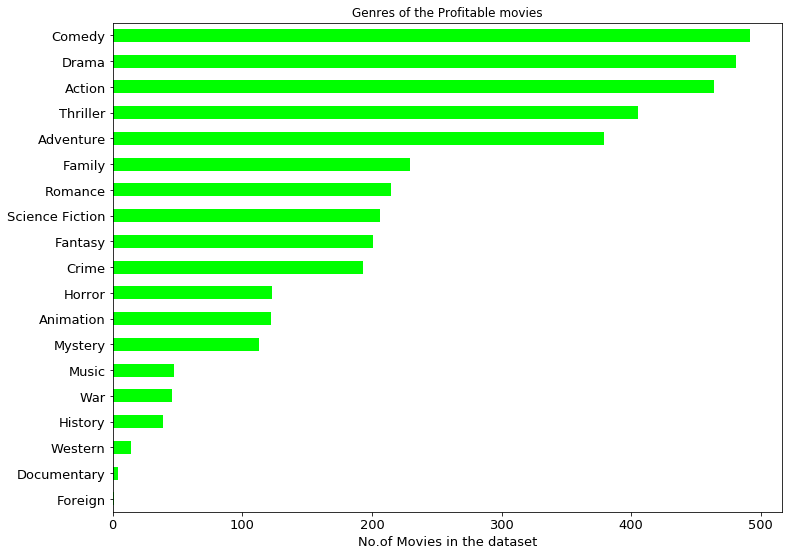

In [29]:
# Let's plot the points in descending order top to bottom as we have data in same format
count.sort_values(ascending=True, inplace=True)
lt = count.plot.barh(color='#00FF00', fontsize=13)
lt.set(title='Genres of the Profitable movies')
lt.set_xlabel('No.of Movies in the dataset', color='black', fontsize='13')   # On x-axis
lt.figure.set_size_inches(12, 9)
plt.show()

### Research Question 8 : Most Frequent Cast

>We will call the same function **data(column)** again for this analysis.

In [30]:
# Variable that stores the retured value
count = data('cast')
# Printing the top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> As expecteted, Tom Cruise is on the top with a total of 27, followed by Brad Pitt with 25 and Tom Hanks with 22.  

### Research Question 9 : Average Budget of the movies

In [31]:
def profit_avg(column):
    '''
    Function to find the average
    '''
    return profit_data[column].mean()

In [32]:
# Calling the above defined function on the 'budget' column
print("The average budget of the movies is: ", profit_avg('budget'), "USD")

The average budget of the movies is:  60444957.76083707 USD


> So the movies having a profit of 50 million USD or more have an average budget of 60 million USD.

### Research Question 10 : Average Revenue earned by the movies


In [33]:
# Calling the above defined function on the 'revenue' column
print("The average revenue of the movies is: ", profit_avg('revenue'), "USD")

The average revenue of the movies is:  254957662.59491777 USD


>So the movies having a profit of 50 million USD or more have an average revenue of 255 million USD.

### Research Question 11 : Average duration of the movies

In [34]:
# Calling the above defined function on the 'runtime' column
print("The average runtime of the movies is: ", profit_avg('runtime'), "minutes")

The average runtime of the movies is:  113.66741405082212 minutes


>So the movies having profit of 50 million USD or more have an average duration of 113 minutes.

<a id='conclusions'></a>
## Conclusions
> This was a very interesting data analysis project. We came out with some really cool facts about movies that we usually see. After this analysis we can conclude the following: - 
>
> **For a movie to be in SUCCESSFUL:**
> 1. Average budget must be atleast *60 millon USD*.
> 2. Average duration of the movie must be atleast *113 minutes*.
> 3. Any one of these should be in the cast: *Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron Diaz*.
> 4. Genre must be: *Action, Adventure, Thriller, Comedy, Drama*.
>
> By doing all this the movie might be one of the hits and hence can earn an average revenue of around **255 million USD**.
>
>**Noteworthy Limitations:** This analysis was done considering the movies which had a **significant** amount of profit of around 50 million USD. This might not be completely error free, but by following these suggestions one can increase the chance of a movie to become a hit. Moreover, we are NOT really sure if the data provided to us is **completely correct** and **up-to-date**. As mentioned before, the budget and the revenue column do not have any currency unit. So it might be possible that different movies have budgets in different currency according to the country they are produced from. So a disparity arises here which can disprove the complete analysis that we've done so far. Also, dropping the rows with the missing values also affected the overall analysis.